<a href="https://colab.research.google.com/github/e-white25/Python_practice/blob/main/Genomics_Midterm_Spring2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Midterm Exam

### Question 1-2
You work at a startup that is trying to bioprospect human gut metagenomic data. They recently developed a DNA-based LLM and have generated a handful of sequences. They now want to determine whether these sequences are statistically distinguishable from naturally occurring data.

Run the cell below to download two datasets, one from AI generated sequences and one from real data.


In [ ]:
!pip install gdown
!gdown 124nJeiT7tNrI-YjZ4lNb8uUBmkKqZhRY
!gdown 1Okf8cEt2RU_kNvTUnkQx3hDiEE4SA5aE

##Assessing FASTA file structures: 

In [ ]:
!pip install pandas

In [ ]:
### import a multifasta into a dictionary or convert this into a table (using bash for example) and load it as a df.
### Note: datasets stored as:

# c:\Users\eawhi\Genomics\Practice\Artificial.fasta
# c:\Users\eawhi\Genomics\Practice\Real.fasta

import pandas as pd

## Taking a look at the files:
with open("Artificial.fasta", "r") as file:
    for i in range(10):
        print("AI", file.readline().strip())

with open("Real.fasta", "r") as file:
    for i in range(10):
        print("REAL", file.readline().strip())

## Q1. Make the FASTA files into dictionaries

In [ ]:
AI_fasta_dict = {}
with open("Artificial.fasta", "r") as file:
    current_id = None #initializes a placeholder
    for line in file:
        line = line.strip()
        if line.startswith(">"):
            current_id = line[1:]  # slice from the 2nd character/index 1
            AI_fasta_dict[current_id] = ""  # initialize new string in dictionary with key 'current_ID' and value = empty string (e.g "contig1":"")
        else: #anything but the header - in this case it's the sequence
            AI_fasta_dict[current_id] += line  # add/append sequence data to its ID
print(AI_fasta_dict)

REAL_fasta_dict = {}
with open("Real.fasta", "r") as file:
    current_id = None #initializes a placeholder
    for line in file:
        line = line.strip()
        if line.startswith(">"):
            current_id = line[1:]  # slice from the 2nd character/index 1
            REAL_fasta_dict[current_id] = ""  # initialize new string in dictionary with key 'current_ID' and value = empty string (e.g "contig1":"")
        else: #anything but the header - in this case it's the sequence
            REAL_fasta_dict[current_id] += line  # add/append sequence data to its ID
print(REAL_fasta_dict)

## Q2a. Calculate the GC content of each sequence

In [ ]:
#Global GC function
def GC_content(seq: str) -> float:
    seq = seq.upper()
    if not seq:
        return float("NaN") # account for empty/blank reads
    GC_count = seq.count('G') + seq.count('C')
    return round(GC_count / len(seq) * 100, 2)       #round to keep only 2 decimals 

#REAL Data > calc GC corresponding to read_ID, seq
REAL_GC_list = []
for contig, seq in REAL_fasta_dict.items():         # loop grabs [key, value] in {dic} with .items
    gc_content_REAL = GC_content(seq) # Calculate GC content for the current sequence.
    REAL_GC_list.append([contig, gc_content_REAL]) # Append sequence ID and GC content to the list.

# AI DATA > calculate GC corresponding to read_ID, seq
AI_GC_list =[]
for contig, seq in AI_fasta_dict.items():
    gc_content_AI = GC_content(seq)
    AI_GC_list.append([contig, gc_content_AI]) 

# Create DataFrame from the lists
REAL_GC_df = pd.DataFrame(REAL_GC_list, columns=["contig", "gc_content_REAL"])
print(REAL_GC_df)

AI_GC_df = pd.DataFrame(AI_GC_list, columns=["contig", "gc_content_AI"])
print(AI_GC_df)

## Q2b. Return: The ID of the string having the highest GC-content, followed by the GC-content of that string

In [49]:
#print ID with max GC content
max_GC_REAL_data = REAL_GC_df.loc[REAL_GC_df["gc_content_REAL"].idxmax()] # .loc gives row index of seq w/highest GC
max_GC_AI_data = AI_GC_df.loc[AI_GC_df["gc_content_AI"].idxmax()] 
print("Highest GC Content AI:", max_GC_AI_data)
print("Highest GC Content REAL", max_GC_REAL_data)

Highest GC Content AI: contig           contig_13
gc_content_AI         75.5
Name: 13, dtype: object
Highest GC Content REAL contig             real_contig26
gc_content_REAL             45.5
Name: 26, dtype: object


In [50]:
#Combining dfs
#ALL_contigs_GC = pd.DataFrame(REAL_GC_list + AI_GC_list,
                              #columns =["contig", "GC_content", "dataset"])

In [ ]:
#Troubleshooting Error
type(REAL_GC_list), type(AI_GC_list)    # > checking to maake sure they are lists (not df)

print(REAL_GC_list[:3])                 # > see what first few entries look like
print(AI_GC_list[:3])

print({len(r) for r in REAL_GC_list})       # > do the different lists have the same number of elements
print({len(r) for r in AI_GC_list})

*ERROR: passed 3 column names but combined list has only 2 values per row*

Checked with: 
> columns = _validate_or_indexify_columns(contents, columns) 
> Returned > ValueError: 3 columns passed, passed data had 2 columns 

Solution: 
> Add a dataset tag to each entry so it is clear if read is AI or REAL

In [ ]:
#Tagging lists [key, value] > [key, value, tag] i.e list comprehension

#Loop over every (key, value) pair inside GC_list and produce a new list with 3 elements:
REAL_tag = [(contig, gc_content, "REAL") for (contig, gc_content) in REAL_GC_list]
AI_tag = [(contig, gc_content, "AIL") for (contig, gc_content) in AI_GC_list]

#Make new df for combined data

ALL_contigs_GC = pd.DataFrame(REAL_tag + AI_tag,
                              columns = ["contig", "gc_content", "dataset"])

#Clean up contig_ID to just ID number
#ALL_contigs_GC["contig"] = ALL_contigs_GC["contig"].str.split("_").str[-1].astype(int) # remove contig_ and select the last part (###); convert str > intg
#> Error: not all contigs are structured contig_##
ALL_contigs_GC["contig"] = (
    ALL_contigs_GC["contig"]
    .astype(str)        #make sure all entires are strings
    #.str.replace(r"contig_?". "", regex=True)       ## remove - works but im not sure all formats look like this
    .str.extract(r"(\d+)$")      #extract trailing digits (d+ grabs one or more)
    .astype(float)
    )      

#Sort from highest > lowest GC
GC_sorted_df = ALL_contigs_GC.sort_values(by="gc_content", ascending=False)         # highest > lowest by GC

print(GC_sorted_df.head(60))

##**Question 2:** Generate a table of 3-mer distributions for both sets of sequences and visualize them as bar plots.

In [ ]:
!pip install matplotlib

### HINT: This is expected to be done across all sequences not individual sequences, so you can concatenate them to begin with.

*#Thought process...*

> 1. For each dataset, count how often every possible 3-mer (AAA, AAT, AAC,etc. ... so 4^3 = 64) occurs across all sequences 
> 2. Turn the results into a table (counts... could normalize by total length of concatenated sequences), then plot this

In [ ]:
#1 Concatenante sequences by dataset:
AI_tot_bases = "".join(str(seq.upper()) for seq in AI_fasta_dict.values())
REAL_tot_bases = "".join(str(seq.upper()) for seq in REAL_fasta_dict.values())
    #print(type(AI_tot_bases))

# Checking to see type & number of elements in each dictionary
print("dict type/size:", type(AI_fasta_dict), len(AI_fasta_dict))
print("dict type/size:", type(REAL_fasta_dict), len(REAL_fasta_dict))
first = next(iter(AI_fasta_dict.items()))
print("first item:", first)
print(AI_tot_bases[100:])

#Just comparing base content between datasets
AI_base_counts = {base: AI_tot_bases.count(base) for base in "ATGC"}
print(AI_base_counts)
AI_base_count_tot = sum(AI_base_counts.values())
print(AI_base_count_tot)
AI_tot_GC = AI_tot_bases.count("G") + AI_tot_bases.count("C")
print(AI_tot_GC/len(AI_tot_bases)*100)      # checking matches with value outputted by function
print(GC_content(AI_tot_bases))

REAL_base_counts = {base: REAL_tot_bases.count(base) for base in "ATGC"}
print(REAL_base_counts)
REAL_base_count_tot = sum(REAL_base_counts.values())
print(REAL_base_count_tot)
print(GC_content(REAL_tot_bases))

K-mers 

In [ ]:
from collections import Counter 

def k_mer_counts(seq: str, k: int = 3) -> Counter:
    """Count k-mers in one big sequence string, only those containing ACGTN characters
       Using Counter tool"""
    
    if not seq:
        raise ValueError("Input seq empty")
    seq = seq.upper()
    valid_input = set("ATGCN")
    n = len(seq)
    c = Counter()
    
    if n < k:
        return c            # in case sequence is less than desired k-mer (won't happen with this dataset, but in general)
    
    for b in range(n - k + 1):     # SLIDING WINDOW: for base in range (total seq length - 3) + 1) ex: ATTTG > n=5; k=3 --> iterations stop at end: Range(5-3+1) = 3
        k_mer = seq[b:b+k]        # Gives positions (i=index) 0,1,2 + 3 ATT; TTT; TTG
        if set(k_mer) <= valid_input:
                c[k_mer] += 1       #increments the kmer count by 1 each time kmer is detected
    return c

#test
print(k_mer_counts("ATTTG", 3))

In [ ]:
#print(k_mer_counts(AI_tot_bases))   >> works
#print(k_mer_counts(REAL_tot_bases))

#Make a DF with k-mers as index and counts as column
            #NOTE: could also make a series since it's just [kmer: count]; but if want to combine dfs real vs. artificial df might be easier

AI_kmer_counts = k_mer_counts(AI_tot_bases, k=3)
AI_kmers_df = pd.DataFrame.from_dict(AI_kmer_counts, orient="index", columns=["AI_counts"])
AI_kmers_df_sort = AI_kmers_df.sort_values("AI_counts", ascending = False)
print(AI_kmers_df_sort.head(10))
    

In [ ]:
#Making a function to turn counts into DF

def kmer_df(seq, k: int = 3, prefix: str = "") -> pd.DataFrame:
    "return a Data frame after running k-mer counts on a sequence"
    counts = k_mer_counts(seq, k=k)
    col =f"{prefix}_counts"
    kmer_counts_df = pd.DataFrame.from_dict(counts, orient="index", columns=[col])
    sorted_kmer_df = kmer_counts_df.sort_values(col, ascending=False)

    return sorted_kmer_df

REAL_kmer_df = kmer_df(REAL_tot_bases, k=3, prefix="REAL")
print(REAL_kmer_df.head(10))

In [ ]:
##Combine DFs to compare:
# use index of both dfs (kmers) to align rows/values
#"how" argument keeps all kmer inputs even if one dataset is missing that value, will fill in with NaN next

merged_kmer_df = pd.merge(AI_kmers_df_sort, REAL_kmer_df, left_index = True, right_index = True, how="outer")
merged_int = merged_kmer_df.reset_index().rename(columns={"counts": "kmer"})        #reset inde just makes sure kmers are the column 

# Fill NaN with 0 (in case a k-mer is missing in one dataset)
merged_final_df = merged_int.fillna(0).astype({"AI_counts": int, "REAL_counts": int})
print(merged_final_df)


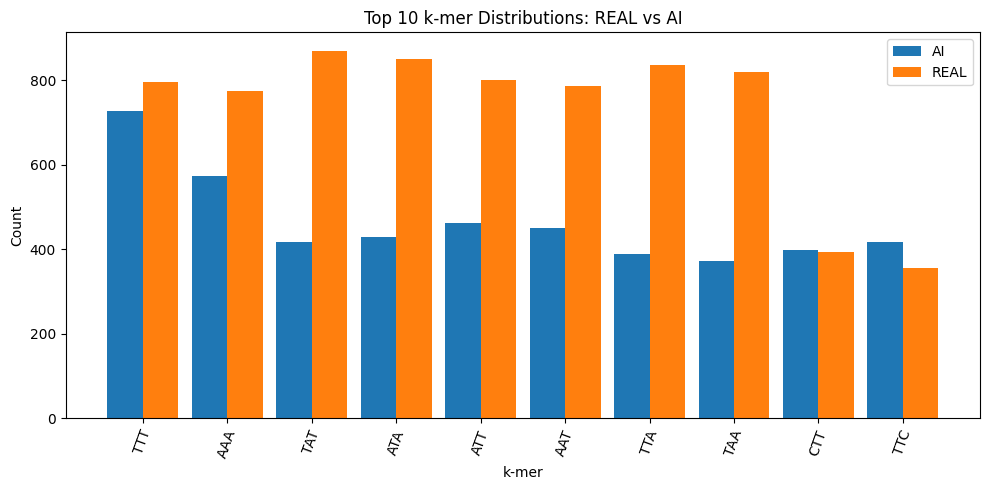

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure k-mers are an index initially
df = merged_final_df.reset_index().rename(columns={'index': 'kmer'}).copy()


# Pick Top N by total (AI + REAL)
TopN = 10
df['total'] = df['AI_counts'] + df['REAL_counts']
top = (df.sort_values('total', ascending=False)
         .head(TopN)
         .reset_index(drop=True))

# Plot grouped bars (AI vs REAL)
x = np.arange(len(top))
width = 0.42

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, top['AI_counts'],   width, label='AI')
ax.bar(x + width/2, top['REAL_counts'], width, label='REAL')

ax.set_xticks(x)
ax.set_xticklabels(top['kmer'], rotation=70)  # <-- pass the Series of k-mer strings here

ax.set_xlabel("k-mer")
ax.set_ylabel("Count")
ax.set_title(f"Top {TopN} k-mer Distributions: REAL vs AI")
ax.legend()
plt.tight_layout()
plt.show()


###Question 3-5
On a side project you are being asked to develop part of a pipeline used to validate copy number variants.

To start, download the VCF file from the link below.



In [ ]:
!gdown 1XCTynSQ1g6cidp0oER6IV58hS6Nh1vR-

import pandas

VCF_df = pandas.read_csv("Insertions.csv", sep = ",")
VCF_df.head(10)

Import it as a pandas DataFrame.

Note: The VCF file only includes copy number variants.

Question 3: Create three functions that: (+30 points)
- a) Calculates the length of an insertion, this is a freeby there is already a function called len()
- b) Generates primers to amplify the insert.
- c) Calculates the melting temperature of these primers.

NOTE: depending on how you solve this you might need more another function like reverse complement.



In [69]:
# Adding columns for the insert length (already in dataframe,  as "SIZE", but removing and repeating for practice
# First, for entries with multiple ALT alleles, need to split these; applying genotype as is (doesn't seem to matter here)
import pandas as pd
from itertools import chain

def split_multi_allelics(row):
    # Read as strings; account for NaN
    alt_str = "" if pd.isna(row.get("ALT")) else str(row["ALT"])
    af_str  = "" if pd.isna(row.get("AF"))  else str(row["AF"])

    # MULTI-allelic: split ALT (and AF if present)
    if "," in alt_str:
        alts = [a.strip() for a in alt_str.split(",") if a.strip() not in ("", ".")]
        afs  = [a.strip() for a in af_str.split(",")] if af_str else []
        # pad AFs if fewer than ALTs
        if len(afs) < len(alts):
            afs += [None] * (len(alts) - len(afs))

        rows = []
        for alt, af in zip(alts, afs):
            new_row = row.copy()
            new_row["ALT"] = alt
            new_row["AF"]  = (
                (af) if isinstance(af, str) and af not in ("", ".")
                else (af if isinstance(af, (int, str)) else None)
            )
            rows.append(new_row)
        return rows

    # BIALLELIC/empty: return a single cleaned row (no alts variable here)
    new_row = row.copy()
    alt_clean = alt_str.strip()
    #clean ALT
    new_row["ALT"] = alt_clean if alt_clean not in ("", ".") else None
    #clean AF
    if af_str:
        af_clean = af_str.strip()
        af_clean = af_clean.strip("()").strip()
        if af_clean in ("", "."):
            new_row["AF"] = None
        else:
        # keep as string (no float conversion - causing error)
            new_row["AF"] = af_clean
    else:
        new_row["AF"] = None
    return [new_row]

# Apply and flatten
expanded_vcf = list(chain.from_iterable(VCF_df.apply(split_multi_allelics, axis=1)))
expanded_vcf = pd.DataFrame(expanded_vcf)

# (optional) keep only specific columns
keep = ["CHROM", "POS", "REF", "ALT", "QUAL", "DP", "AF", "GENOTYPE"]
expanded_vcf = expanded_vcf[[c for c in keep if c in expanded_vcf.columns]]


In [ ]:
# checking if NaNs are new in AF after splitting multiallelic sites:

# Count missing in original input
print("Original AF missing:", VCF_df["AF"].isna().sum())
# Show examples
print(VCF_df[VCF_df["AF"].isna()].head())

print("split AF missing:", expanded_vcf["AF"].isna().sum())
print(expanded_vcf[expanded_vcf["AF"].isna()].head())

print(VCF_df.shape[0])
print(expanded_vcf.shape[0])

In [ ]:
expanded_vcf.head(10)
#still contains () in the splif AF entries; also stored as strings

In [ ]:
expanded_vcf["AF"] = pd.to_numeric(
    expanded_vcf["AF"].astype(str).str.strip("()"),
    errors="coerce"
)
expanded_vcf.head(10)

In [ ]:
#a) back to adding length column based on ALT ("insert")
expanded_vcf["INSERT"] = expanded_vcf["ALT"].astype(str).str.len()
expanded_vcf.head(5)

In [102]:

#b) generate FORWARD primer for insert:

def generate_primer(row: str, s: int = 10):
  insert = row["ALT"]
  chrom = row["CHROM"]
  pos = row["POS"]
  if pd.isna(insert):
    return (None, None)
  
  valid_bases = set("ACGTN")
  insert = str(insert).upper()
  if not set(insert).issubset(valid_bases):
        raise ValueError(f"Invalid base found in {chrom}:{pos} sequence: {insert}")
  
  cDNA_lib = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
  fwd_primer = insert[:s]
  rev_primer = ''
  rev_seq = insert[::-1] # reverses the entire insert
  rev_primer = ''.join(cDNA_lib[b] for b in rev_seq[:s])

  return (fwd_primer, rev_primer)

In [104]:
#Run primer function on data frame
s = 10
expanded_vcf[["FWD_PRIMER", "REV_PRIMER"]] = expanded_vcf.apply(lambda row: pd.Series(generate_primer(row, s)), axis=1)     

#axis=1 switches from default (col) to row; lambda iterates (x+1) through rows

In [ ]:
expanded_vcf.head()

In [112]:
#c) The general formula for melting temp is 4°C*(# G/C nucleotides) + 2°C*(# A/T nucleotides)
def melting_temp(seq):
  '''Return melting temp (C) for a sequence (string)'''
  if pd.isna(seq):
    return None
  seq = str(seq).upper()
  GC_count = seq.count('G') + seq.count('C')
  AT_count = seq.count('A') + seq.count('T')
  melt_tmp = (4*GC_count + 2*AT_count)
  return(melt_tmp)

Question 4: Apply your function from (a) to all insertions and store the output in a new column. (+10 points)



In [114]:
expanded_vcf["TM_FWD"] = expanded_vcf["FWD_PRIMER"].apply(melting_temp)
expanded_vcf["TM_REV"] = expanded_vcf["REV_PRIMER"].apply(melting_temp)
expanded_vcf.head()

,CHROM,POS,REF,ALT,QUAL,DP,AF,GENOTYPE,ALT_lEN,INSERT,FWD_PRIMER,REV_PRIMER,TM_FWD,TM_REV
0,chr1,84002,G,GAAAGAAAGAAAGAAAA,85.750000,4,0.5,1,17,17,GAAAGAAAGA,TTTTCTTTCT,26,24
1,chr1,789680,A,AGGAATGGAAT,562.729980,24,0.5,1,11,11,AGGAATGGAA,ATTCCATTCC,28,28
1,chr1,789680,A,AGGAATGGAATGGAAT,562.729980,24,0.5,1,16,16,AGGAATGGAA,ATTCCATTCC,28,28
2,chr1,791544,T,TGAATGGAATGGAATC,70.730003,25,0.5,1,16,16,TGAATGGAAT,GATTCCATTC,26,28
3,chr1,820897,G,GCCAGCAGATCCACCCTGTCTACACTACCTGCCTGGGCAGTAGTTC...,479.730011,24,0.5,1,141,141,GCCAGCAGAT,ACAGGCAGGT,32,32


Question 5: Subset your DataFrame to select insertions larger than 50 bp. Save this subset as a new DataFrame. Apply your functions from (b) and (c) to this new DataFrame and store the results in two new columns. (+20 points)

In [129]:
#Just renaming for congrunecy (l > L
expanded_vcf = expanded_vcf.rename(columns={"ALT_lEN": "ALT_LEN"})

In [135]:
expanded_vcf.head()
#accidentally made a new column when changing column names
expanded_vcf = expanded_vcf.iloc[:, :-1]


In [136]:
select_subset = expanded_vcf[expanded_vcf["ALT_LEN"] > 50]
select_subset.head()

,CHROM,POS,REF,ALT,QUAL,DP,AF,GENOTYPE,ALT_LEN,INSERT,FWD_PRIMER,REV_PRIMER,TM_FWD,TM_REV
3,chr1,820897,G,GCCAGCAGATCCACCCTGTCTACACTACCTGCCTGGGCAGTAGTTC...,479.730011,24,0.5,1,141,141,GCCAGCAGAT,ACAGGCAGGT,32,32
17,chr1,1068824,G,GGCCACGCGGGCTGTGCAGATGCAGGTGCGGCGGGGCGGGGCCACG...,1318.729980,29,1.0,3,79,79,GGCCACGCGG,TCTGCCCCGC,38,36
28,chr1,1565684,T,TGGTGCAGGCAGAGAACAGACGTCGCGATGGGCCCGACGGTGCTGG...,2138.729980,39,1.0,3,97,97,TGGTGCAGGC,CCCCTGAGCC,34,36
35,chr1,1749605,C,CGTCCATGCATATTTTTCTGTGTGATGTGTCTGTGTGTGTGTCTCA...,705.729980,14,1.0,3,51,51,CGTCCATGCA,ACCACTGAGA,32,30
37,chr1,1993704,A,AGGGCACAGTGGCTCATGCCTGTAATCCCAGCAACATGGGAGCCTG...,1969.729980,46,1.0,3,148,148,AGGGCACAGT,GGCCACTTTT,32,30
